<a href="https://colab.research.google.com/github/Feny-rs/sprouts_model/blob/master/Inception_v3_imageNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install roboflow
!pip install tensorflow

In [11]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="CLAcDuqXX6buLaKIgh29")
project = rf.workspace("politeknik-negeri-semarang-nurcn").project("yolo-sprouts-classification")
dataset = project.version(4).download("multiclass")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Yolo-Sprouts-Classification-4 in multiclass:: 100%|██████████| 1282/1282 [00:00<00:00, 2095.61it/s]


loading Roboflow workspace...
loading Roboflow project...
{'predictions': [{'time': 0.13071110799955932, 'image': {'width': 640, 'height': 640}, 'predictions': {'abnormal': {'confidence': 0.08979448676109314}, 'mati': {'confidence': 0.07483324408531189}, 'normal': {'confidence': 0.9153447151184082}, 'normal pembusukan': {'confidence': 0.08086922764778137}}, 'predicted_classes': ['normal'], 'image_path': '/content/Yolo-Sprouts-Classification-4/valid/DSC_0180_JPG.rf.853d764a346ffda579ccdd0cd55c6458.jpg', 'prediction_type': 'ClassificationModel'}], 'image': (640, 640)}


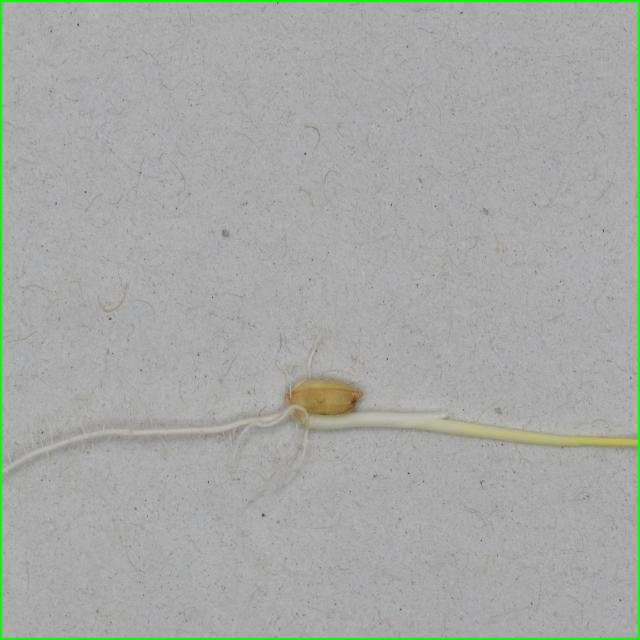

Class: normal, Confidence: 91.53%


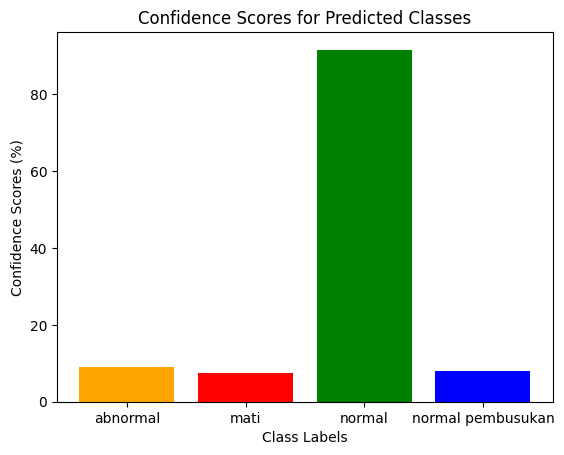

In [52]:
import cv2
from roboflow import Roboflow
from IPython.display import Image, display
import matplotlib.pyplot as plt

rf = Roboflow(api_key="CLAcDuqXX6buLaKIgh29")
project = rf.workspace("politeknik-negeri-semarang-nurcn").project("yolo-sprouts-classification")
model = project.version("5").model

image_path = "/content/Yolo-Sprouts-Classification-4/valid/DSC_0180_JPG.rf.853d764a346ffda579ccdd0cd55c6458.jpg"

# infer on a local image
print(model.predict(image_path).json())
prediction = model.predict(image_path).json()

# visualize your prediction
# Extract prediction information
predictions = prediction['predictions'][0]['predictions']
class_label = max(predictions, key=lambda k: predictions[k]['confidence'])
probability = predictions[class_label]['confidence']

# Function to get color based on class
def get_color(class_label):
    class_colors = {
        "abnormal": (0, 165, 255),  # Orange (BGR format)
        "mati": (0, 0, 255),       # Red (BGR format)
        "normal": (0, 255, 0),     # Green (BGR format)
        "normal pembusukan": (255, 0, 0),  # Blue (BGR format)
    }
    return class_colors.get(class_label, (128, 128, 128))  # Default to gray if not found

#  Load your image
image = cv2.imread(image_path)
stroke_color = get_color(class_label)  # Get the color based on the class_label
stroke_thickness = 2
height, width, _ = image.shape
cv2.rectangle(image, (0, 0), (width - 1, height - 1), stroke_color, stroke_thickness)
cv2.imwrite("image_with_stroke.jpg", image)
# Load the image with the stroke
display(Image(filename='image_with_stroke.jpg'))

# Initialize an empty list to store the text representation
text_prediction = []

# Iterate through the predictions
for pred in prediction['predictions']:
    # Get the class label
    class_label = max(pred['predictions'], key=lambda k: pred['predictions'][k]['confidence'])
    confidence = pred['predictions'][class_label]['confidence']

    # Convert confidence to a percentage
    confidence_percent = confidence * 100

    # Format the prediction into a human-readable text with confidence as a percentage
    text = f"Class: {class_label}, Confidence: {confidence_percent:.2f}%"

    # Append the text to the list
    text_prediction.append(text)

# Join the text predictions into a single string
result_text = '\n'.join(text_prediction)

# Print or use the result_text as needed
print(result_text)


# Extract the confidence scores
confidences = prediction['predictions'][0]['predictions']
class_labels = list(confidences.keys())
confidence_values = [confidences[label]['confidence'] * 100 for label in class_labels]  # Convert to percentages

# Create a bar chart
plt.bar(class_labels, confidence_values, color=['orange', 'red', 'green', 'blue'])

# Add labels and title
plt.xlabel('Class Labels')
plt.ylabel('Confidence Scores (%)')  # Update the ylabel to include %
plt.title('Confidence Scores for Predicted Classes')

# Show the plot
plt.show()